In [1]:
from jdaviz.configs.mosviz.helper import MosViz

/Users/nearl/projects/glue/glue/external/echo/__init__.py:3: UserWarning: glue.external.echo is deprecated, import from echo directly instead
  warnings.warn('glue.external.echo is deprecated, import from echo directly instead')


In [2]:
mosviz = MosViz()
mosviz.app

# from jdaviz.app import Application

# app = Application(configuration='default')
# app

Application(components={'g-viewer-tab': '<template>\n  <component :is="stack.container">\n    <g-viewer-tab\n …

In [4]:
# app.load_data("w5_psc.csv")

from specutils import Spectrum1D, SpectrumCollection
import astropy.units as u
import numpy as np

spec = Spectrum1D(spectral_axis=np.arange(10) * u.AA, flux=np.random.sample(10) * u.Jy)
# mosviz.load_1d_spectra(spec, data_labels=['Test'])

spec_coll = SpectrumCollection.from_spectra([spec for _ in range(5)])
mosviz.load_1d_spectra(spec_coll, data_labels=['Test' for _ in range(5)])

WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS : 0  0

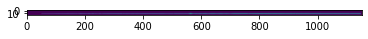

In [36]:
# spec_coll = Spectrum1D.read("/Users/nearl/Downloads/mosviz_nirspec_data_0.3/level3/f170lp-g235m_mos_observation-6-c0e0_s00227_s2d.fits")
# mosviz.load_1d_spectra(spec_coll, data_labels=['Test'])
from astropy.io import fits
from astropy.wcs import WCS
from spectral_cube import SpectralCube

path = "/Users/nearl/Downloads/mosviz_nirspec_data_0.3/level3/f170lp-g235m_mos_observation-6-c0e0_s00227_s2d.fits"

# fits.setval(path, 'CUNIT3', value='micron', ext=1)
# sc = SpectralCube.read(path, hdu=1)

spec = Spectrum1D.read(path, format="JWST s2d")

# with fits.open(path) as hdulist:
#     print(hdulist[1].data)
    
import matplotlib.pyplot as plt

f, ax = plt.subplots()

ax.imshow(spec.flux.data)

#     wcs = WCS(hdulist[0].header)
# print(hdulist[1].header.__repr__)
    
    
wcs

In [ ]:
from glue_jupyter.table import TableViewer

In [ ]:
tv = TableViewer(app.session)
tv.figure_widget

In [ ]:
from glue_jupyter.app import JupyterApplication
from glue_jupyter.table import TableViewer
from glue_jupyter.data import require_data
require_data("Astronomy/W5/w5_psc.csv")

In [ ]:
app = JupyterApplication()
# app.load_data("w5_psc.csv")


In [ ]:
from glue_jupyter.utils import validate_data_argument
from glue.core.data import Data

data = Data(x=[], label=None)
app.data_collection.append(data)

# data = validate_data_argument(app.data_collection, data)
data.components

In [ ]:
# viewer = app.new_data_viewer(TableViewer, data=app.data_collection, show=False)
from glue_jupyter.table import TableViewer
from jdaviz.configs.mosviz.plugins.viewers import MOSVizTableViewer

from glue_jupyter.app import JupyterApplication
app = JupyterApplication()
app.load_data("w5_psc.csv")

view = app.new_data_viewer(MOSVizTableViewer, data=None, show=True)
# app.table(data="w5_psc")

# view.figure_widget.model_id
# layer_state = {}
# view.layers[0].state.update_from_dict(layer_state)

view

In [ ]:
# app.data_collection['Table'].update_components({app.data_collection['Table'].get_component('1D Spectrum'): [1, 2, 3],
#                                                 app.data_collection['Table'].get_component('2D Spectrum'): [1, 2, 3],
#                                                 app.data_collection['Table'].get_component('DEC'): [1, 2, 3],
#                                                 app.data_collection['Table'].get_component('RA'): [1, 2, 3],
#                                                 app.data_collection['Table'].get_component('Image'): [1, 2, 3],
#                                                 app.data_collection['Table'].get_component('ID'): [1, 2, 3]})
data = app.data_collection['Table']

# for name in data.components:
#     data.remove_component(data.id[name])
    
app.data_collection['Table'].add_component([4, 5, 6], '3D Spectrum')
data.components

In [ ]:
from glue_jupyter.table.viewer import TableGlue

TableGlue(data=None)

In [ ]:
# import ipyvuetify as v
from traitlets import Unicode, List, Bool, observe
from astropy.table import QTable
from glue.core.message import SubsetCreateMessage, SubsetUpdateMessage, DataCollectionAddMessage
from glue.core import HubListener
from glue.core.state_objects import State
from glue_jupyter.state_traitlets_helpers import GlueState
from echo import CallbackProperty, DictCallbackProperty, ListCallbackProperty

from glue_jupyter.app import JupyterApplication
app = JupyterApplication()
app.load_data("w5_psc.csv")


template = """
<template>
  <v-data-table
    v-model="selected"
    :headers="headers"
    :items="items"
    class="elevation-1"
    show-select
  >
    <template v-slot:item.calories="{ item }">
      <v-chip :color="get_color(item.calories)" dark>{{ item.calories }}</v-chip>
    </template>
    <template v-slot:item.spec1d="{ item }">
        <v-select
          :items="dc_items"
      ></v-select>
      </template>
      <template v-slot:item.spec2d="{ item }">
        
            <v-text-field
              v-model="item.cutout"
              label="Edit"
              single-line
              counter
            ></v-text-field>
      </template>
      <template v-slot:item.cutout="{ item }">
        <v-edit-dialog
          :return-value.sync="item.cutout"
        > {{ item.cutout }}
          <template v-slot:input>
              <v-select :items="dc_items" v-model="selected_dc_item"></v-select>
              <v-select :items="comp_items" v-model="selected_comp_item"></v-select>
          </template>
        </v-edit-dialog>
      </template>
  </v-data-table>
</template>
"""


class TableState(State):
    headers = ListCallbackProperty([
          {
            'text': 'ID',
            'align': 'start',
            'sortable': True,
            'value': 'id',
          },
          { 'text': 'RA', 'value': 'ra' },
          { 'text': 'DEC', 'value': 'dec' },
          { 'text': 'Spectrum 1D', 'value': 'spec1d' },
          { 'text': 'Spectrum 2D', 'value': 'spec2d' },
          { 'text': 'Cutout', 'value': 'cutout' },
          { 'text': 'Slit Width', 'value': 'slit_width' },
          { 'text': 'Slit Height', 'value': 'slit_height' },
          { 'text': 'Pixel Scale', 'value': 'pix_scale' }])
    selected = ListCallbackProperty()
    items = ListCallbackProperty([
          {
            'id': '0',
            'ra': 159,
            'dec': 6.0,
            'spec1d': {
                'dc_item': None,
                'comp_item': None
            },
            'spec2d': {
                'dc_item': None,
                'comp_item': None
            },
            'cutout': '1%',
            'slit_width': '1%',
            'slit_height': '1%',
            'pix_scale': '1%',
          }])
    dc_items = ListCallbackProperty()
    comp_items = ListCallbackProperty()


class TableViewer(v.VuetifyTemplate, HubListener):
    template = Unicode(template).tag(sync=True)
    state = GlueState().tag(sync=True)
    
    def __init__(self, session, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
        self.state = TableState()
        
        self._table = QTable()
        self._session = session
        
        self._session.hub.subscribe(
            self, SubsetCreateMessage,
            handler=self._on_subset_updated)
        
        self._session.hub.subscribe(
            self, SubsetUpdateMessage,
            handler=self._on_subset_updated)
        
        self._session.hub.subscribe(
            self, DataCollectionAddMessage,
            handler=self._on_data_collection_changed)
        
        self._on_data_collection_changed()
        
    def _on_data_collection_changed(self, *args, **kwargs):
        self.state.dc_items = [x.label for x in self._session.data_collection]
        
    @observe("selected_dc_item")
    def _update_comp_items(self, *args, **kwargs):
        self.state.comp_items = [x.label for x in self._session.data_collection[
            self.state.selected_dc_item].components]
        
    def _on_subset_updated(self, msg):
        print(msg)
        
    def load_data(self, data):
        pass
    
    def _update_headers(self):
        self.headers = [{
            'text': x,
            'align': 'start',
            'sortable': False,
            'value': 'name',
          } for x in self._table.colnames]
        
    def _update_items(self):
        self.items = [{
                k: v.to_string() if hasattr(v, 'unit') else v for k,v in zip(t[i].colnames, t[i])}
            for i in range(len(self._table))]
    
    def _add_item(self, item):
        pass
    
    def _remove_item(self, item):
        pass
        
    def vue_get_color(self, calories):
        if calories > 400:
            return 'red'
        elif calories > 200:
            return 'orange'
        
        return 'green'
    
tv = TableViewer(app.session)
tv

In [ ]:
%%javascript

Jupyter.keyboard_manager.register_events(document.getElementById("base-app"))

# 

In [ ]:
app.scatter2d()

In [ ]:
type(app.data_collection[0].components[0].label)

In [ ]:
from astropy.table import QTable
import astropy.units as u
import numpy as np

a = np.array([1, 4, 5], dtype=np.int32)
b = [2.0, 5.0, 8.5]
c = ['x', 'y', 'z']
d = [10, 20, 30] * u.m / u.s

t = QTable([a, b, c, d],
           names=('a', 'b', 'c', 'd'),
           meta={'name': 'first table'})

In [ ]:
[
    {k: v.to_string() if hasattr(v, 'unit') else v for k,v in zip(t[i].colnames, t[i])}
    for i in range(len(t))
]

In [ ]:
a = 10 * u.AA

In [ ]:
from glue.core.data import Data


d = Data(label="Test")

In [ ]:
d.add_component([0, 2, 4], label="x")

In [ ]:
d.components